<a href="https://colab.research.google.com/github/suleimantaofik6/Breat-Tumour-Classification-using-KNN-and-Feature-Engineering/blob/main/Breast_Tumour_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this challenge, I used the Breast Cancer Wisconsin (Diagnostic) Database.

My aim is to improve the performance of the classification model by combining KNN classifier with feature engineering techniques such as PCA, LDA, and StandardScaler.

In [145]:
# Important all the libraries needed for this project

from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier   
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pylab as plt
import numpy as np
import pandas as pd



```
Load the data set and have a look
```



In [146]:
breast_dataset=load_breast_cancer()

# Let convert the dataset to a pandas dataframe for better visualization
breast_data_pd = pd.DataFrame(breast_dataset.data,columns=breast_dataset.feature_names)
breast_data_pd.head()



,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [147]:
# Let check if there is a need for data cleaning.

print('Shape:\n', breast_data_pd.shape, '\n')
print('Features:\n', (breast_dataset.feature_names), '\n')
print('Target:\n', (breast_dataset.target_names), '\n')
print('Information about the data set:\n')
print(breast_data_pd.info())

Shape:
 (569, 30) 

Features:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension'] 

Target:
 ['malignant' 'benign'] 

Information about the data set:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter     

array([[<Axes: xlabel='mean radius', ylabel='mean radius'>,
        <Axes: xlabel='mean texture', ylabel='mean radius'>,
        <Axes: xlabel='mean perimeter', ylabel='mean radius'>,
        <Axes: xlabel='mean area', ylabel='mean radius'>,
        <Axes: xlabel='mean smoothness', ylabel='mean radius'>,
        <Axes: xlabel='mean compactness', ylabel='mean radius'>,
        <Axes: xlabel='mean concavity', ylabel='mean radius'>,
        <Axes: xlabel='mean concave points', ylabel='mean radius'>,
        <Axes: xlabel='mean symmetry', ylabel='mean radius'>,
        <Axes: xlabel='mean fractal dimension', ylabel='mean radius'>,
        <Axes: xlabel='radius error', ylabel='mean radius'>,
        <Axes: xlabel='texture error', ylabel='mean radius'>,
        <Axes: xlabel='perimeter error', ylabel='mean radius'>,
        <Axes: xlabel='area error', ylabel='mean radius'>,
        <Axes: xlabel='smoothness error', ylabel='mean radius'>,
        <Axes: xlabel='compactness error', ylabel='mea

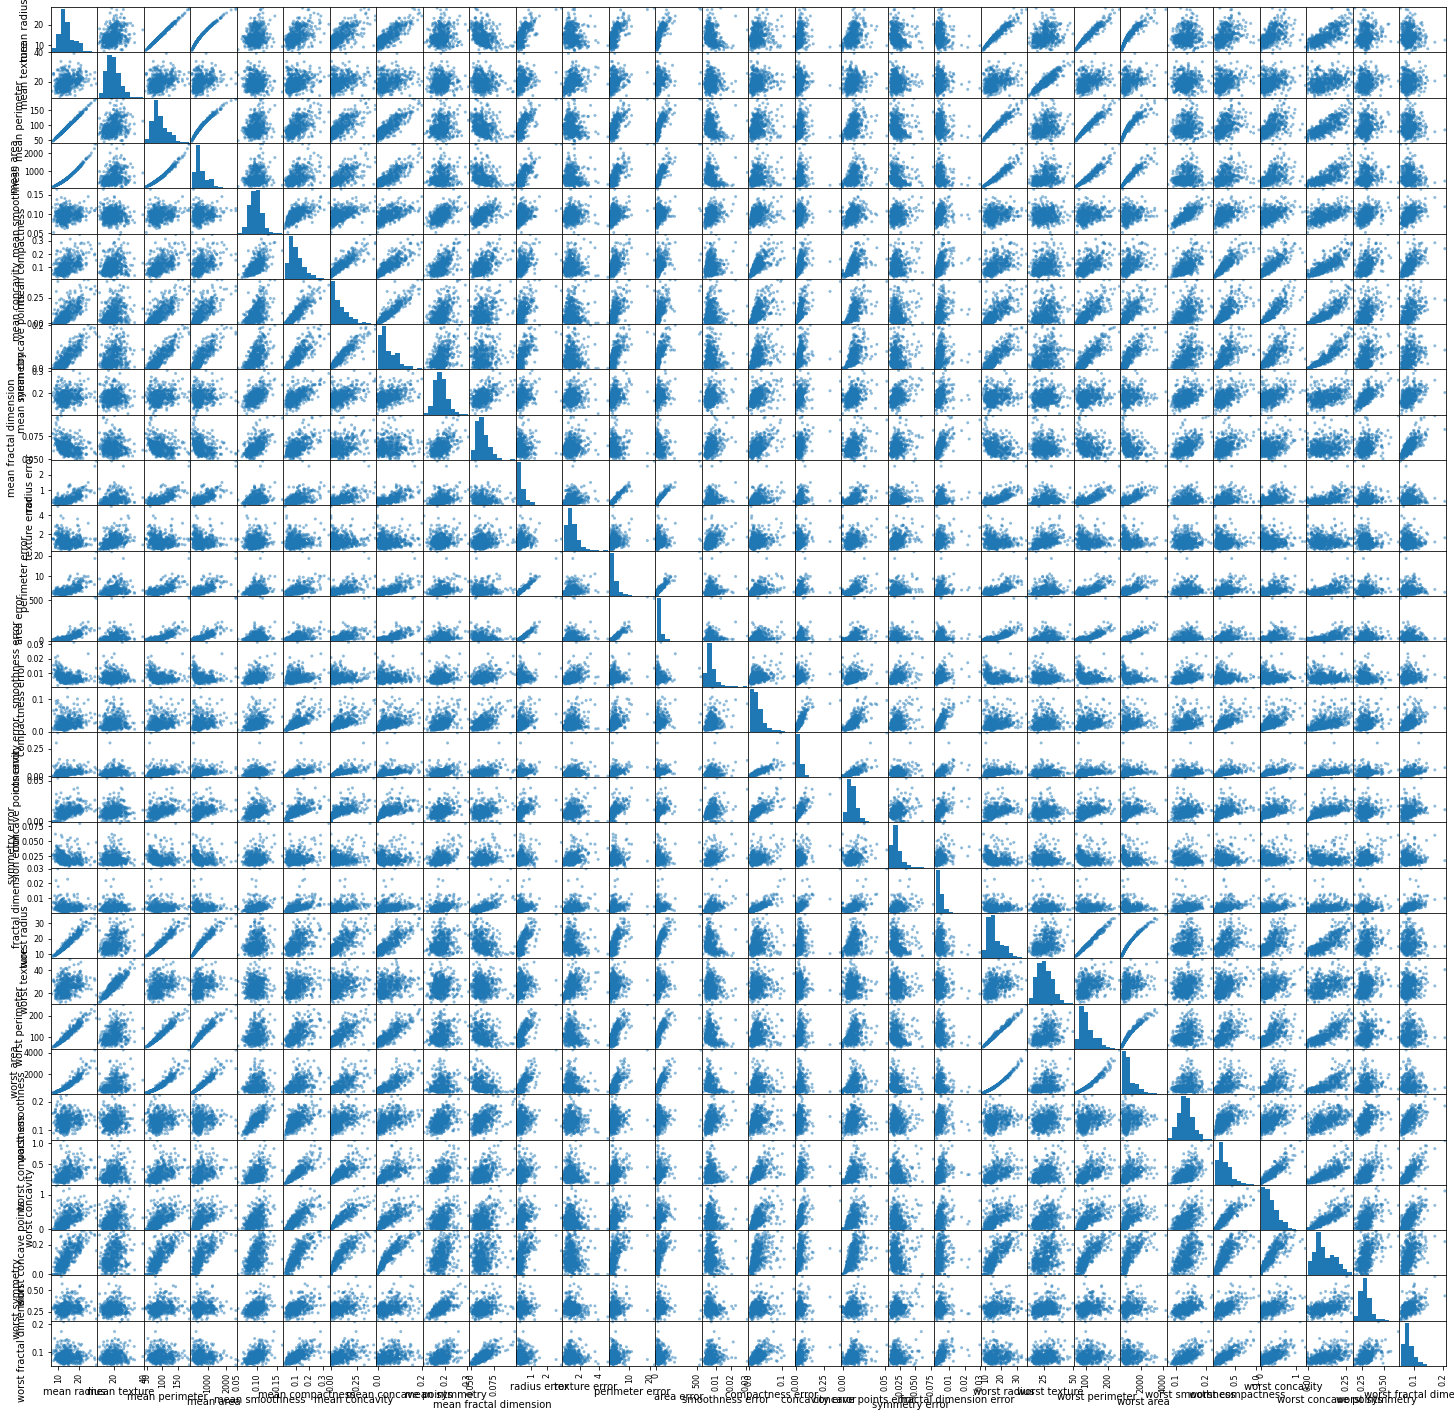

In [148]:
# Since there are no missing values, let plot a scatter matrix to have more insight about the dataset

breast_data_pd['target'] = breast_dataset.target
pd.plotting.scatter_matrix(breast_data_pd[breast_dataset.feature_names],figsize=(25,25))



```
Let split and train the model using KNN Classifier without feature engineering and with Feature engineering
```





In [149]:
#Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(breast_dataset.data, breast_dataset.target, stratify=breast_dataset.target, random_state=42)

# Train the model using KNN Classifier without feature engineering
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
scores = knn.predict(X_test)
# Show the prediction accuracy with KNN classification
print('The Prediction accuracy without feature engineering is', '{:.2%}'.format(accuracy_score(y_test, scores)))


# Let Apply Feature Engineering techniques to improve the accuracy of this prediction

# 1. Feature transformation using Standardized Scaler
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
scaler2 = preprocessing.StandardScaler().fit(X_test)
X_test = scaler.transform(X_test)
# Train the model again
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
scores = knn.predict(X_test)
# Show prediction accuracy
print('The Prediction accuracy with Standardized Scaler is', '{:.2%}'.format(accuracy_score(y_test, scores)))


# 2. Dimensionaity reduction using PCA and LDA, we will load and split the data again
#For PCA
from sklearn.decomposition import PCA
breast_dataset=load_breast_cancer()
breast_data_pd = pd.DataFrame(breast_dataset.data,columns=breast_dataset.feature_names)
#Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(breast_dataset.data, breast_dataset.target, stratify=breast_dataset.target, random_state=42)
pca = PCA(n_components=1)
X_train = pca.fit(X_train).transform(X_train)
X_test = pca.fit(X_test).transform(X_test)
# Train the model again
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
scores = knn.predict(X_test)
# Show prediction accuracy for PCA
print('The Prediction accuracy with PCA is', '{:.2%}'.format(accuracy_score(y_test, scores)))

# For LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
breast_dataset=load_breast_cancer()
breast_data_pd = pd.DataFrame(breast_dataset.data,columns=breast_dataset.feature_names)
#Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(breast_dataset.data, breast_dataset.target, stratify=breast_dataset.target, random_state=42)
lda = LinearDiscriminantAnalysis(n_components=1)
X_train = lda.fit(X_train, y_train ).transform(X_train )
X_test = lda.fit(X_test, y_test).transform(X_test)
# Train the model again
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
scores = knn.predict(X_test)
# Show prediction accuracy
print('The Prediction accuracy with LDA is', '{:.2%}'.format(accuracy_score(y_test, scores)))

# 3. Feature selection using SelectKBest
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
breast_dataset=load_breast_cancer()
breast_data_pd = pd.DataFrame(breast_dataset.data,columns=breast_dataset.feature_names)
#Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(breast_dataset.data, breast_dataset.target, stratify=breast_dataset.target, random_state=42)
X_train = SelectKBest(f_classif, k=14).fit_transform(X_train, y_train)
X_test = SelectKBest(f_classif, k=14).fit_transform(X_test, y_test)
# Train the model again
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
scores = knn.predict(X_test)
# Show prediction accuracy
print('The Prediction accuracy with SelectKBest is', '{:.2%}'.format(accuracy_score(y_test, scores)))

The Prediction accuracy without feature engineering is 93.01%
The Prediction accuracy with Standardized Scaler is 97.20%
The Prediction accuracy with PCA is 86.71%
The Prediction accuracy with LDA is 98.60%
The Prediction accuracy with SelectKBest is 93.71%


**My conclusion:**

The accuracy of the KNN classifer to the breast tumour dataset was initially 93.01%.

To improve on this result, I used standardized scalar feature transformation techniques on both the X train and X test data, and this yielded an accuracy of 97.20%, a 4.19% increase. However, I was still determined to improve this accuracy, so I decided to apply dimensionality reduction techniques.

I first tried principal component analysis (PCA), but the accuracy decreased to 86.71%, a significant decrease from the previous result. Undeterred, I decided to try linear discriminant analysis (LDA), which produced an impressive accuracy of 98.60%, a remarkable 11.89% increase from the initial result.

Encouraged by this success, I attempted to combine PCA and LDA (not shown in the code), but the resulting accuracy was 94.41%, which was lower than the accuracy achieved by LDA alone. Continuing to experiment, I tried transforming the data and then applying PCA, which resulted in a modest improvement in accuracy of 95.10% (Not shown in the code). Finally, I tried univariate feature selection, which resulted in an accuracy of 93.71%, which was lower than the accuracy achieved by LDA.

Based on these results, I confidently conclude that LDA is the most effective method for classifying this breast tumour dataset, with an impressive accuracy of 98.60%. These results demonstrate the effectiveness of feature engineering techniques in improving model performance and represent a significant advancement in our ability to accurately and efficiently diagnose breast cancer.